## Forecast smoke estimates

The main goal of this notebook is to forecast the smoke estimates which we calculate using the formula mentioned in the `1_generate_smoke_estimate.ipynb` notebook. The smoke estimates are also compared to the average AQI over years and we find a correlation between the two.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
# Stats model are used to predict the time series smoke estimate data
from statsmodels.tsa.arima.model import ARIMA

### Step 1: Compare smoke estimates derieved with the AQI values received.

Next step is to understand how good or bad my smoke estimate might be. I will now compare my estimate to available AQI (Air Quality Index) data from the US EPA. The US EPA was only created in 1973, and did not really begin installing air quality monitoring stations until the early 1980s. Further, of 3000+ counties in the US, the EPA has vetted monitoring stations in only 2000 of them. This means that US EPA AQI measures for any one city will need to be some kind of estimate based on monitoring stations that are nearby. 

The final_AQI.csv is generated from the `2_generate_AQI_data.ipynb` file and smoke_estimates.csv is generated by the `1_generate_smoke_estimates.ipynb`. Before running this file make sure both those files are run and the csv is generated.

In [2]:
df_final_AQI = pd.read_csv('../intermediary_files/final_AQI.csv')
filtered_df = pd.read_csv("../intermediary_files/smoke_estimates.csv")
df_final_AQI.head()

,Unnamed: 0.1,Unnamed: 0,state_code,county_code,site_number,parameter_code,latitude,longitude,parameter,sample_duration,date_local,units_of_measure,arithmetic_mean,first_max_value,aqi
0,0,0,24,3,1003,42101,39.169533,-76.627933,Carbon monoxide,1 HOUR,1968-05-02,Parts per million,3.250000,4.0,3.250000
1,1,1,24,3,1003,42101,39.169533,-76.627933,Carbon monoxide,1 HOUR,1968-05-03,Parts per million,1.363636,3.0,1.363636
2,2,2,24,3,1003,42101,39.169533,-76.627933,Carbon monoxide,1 HOUR,1968-05-06,Parts per million,1.750000,3.0,1.750000
3,3,3,24,3,1003,42101,39.169533,-76.627933,Carbon monoxide,1 HOUR,1968-05-07,Parts per million,1.583333,6.0,1.583333
4,4,4,24,3,1003,42101,39.169533,-76.627933,Carbon monoxide,1 HOUR,1968-05-08,Parts per million,1.000000,9.0,1.000000


In [3]:
filtered_df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,year,name,size,type,circleness_scale,avg_distance,perimeter_start,shortest_distance,shortest_latlon,fire_type_encoded,smoke_estimate
0,0,13778,1961-13778-W_C_H_4_3_W1_61 (2),1961,W_C_H_4_3_W1_61 (2),28.693900,Wildfire,0.648984,426.356838,"(35.675731798257715, -83.71589029532807)",426.159008,"(35.67698964517509, -83.70966687469813)",5,0.193407
1,1,13792,1961-13792-FALL BRANC (2),1961,FALL BRANC (2),13.973044,Wildfire,0.580768,428.070862,"(35.658386536996765, -83.73666367421406)",427.994728,"(35.658889182769094, -83.7342160693799)",5,0.088211
2,2,13809,1961-13809-WORLEY KNO (2),1961,WORLEY KNO (2),6.655655,Wildfire,0.745906,420.876349,"(35.46030766855338, -83.41782178915307)",420.797336,"(35.460386527612144, -83.41673215456898)",5,0.049266
3,3,13810,1961-13810-CW_H_4_2_W12_61 (2),1961,CW_H_4_2_W12_61 (2),6.387265,Wildfire,0.761103,439.836810,"(35.60967334366376, -83.9442967311793)",439.793960,"(35.60967334366376, -83.9442967311793)",5,0.045788
4,4,13836,1961-13836-FOOTHILLS (2),1961,FOOTHILLS (2),1.527601,Wildfire,0.782713,435.545571,"(35.670698246564235, -83.90266194869604)",435.501251,"(35.671137177075195, -83.90149204817143)",5,0.011248


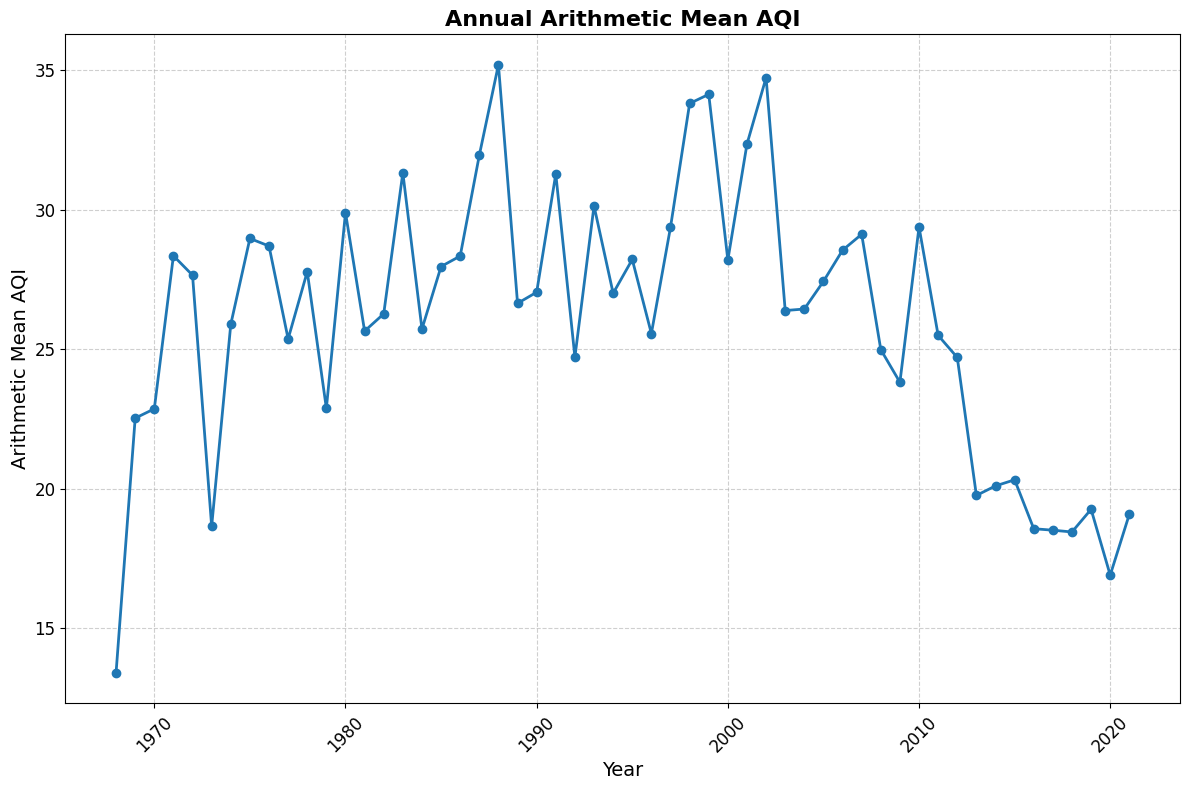

In [4]:
# Ensure 'date' column is in datetime format
df_final_AQI['date_local'] = pd.to_datetime(df_final_AQI['date_local'])
df_final_AQI['year'] = df_final_AQI['date_local'].dt.year
# Group by year to calculate cumulative smoke for each year
# I have decided to use mean to aggregate the yearly AQI to reduce the variations in data
annual_aqi = df_final_AQI.groupby('year')['aqi'].mean()

plt.figure(figsize=(12, 8))

plt.plot(

    annual_aqi.index, annual_aqi.values, 

    marker='o', linestyle='-', linewidth=2

)

plt.xlabel('Year', fontsize=14)

plt.ylabel('Arithmetic Mean AQI', fontsize=14)

plt.title('Annual Arithmetic Mean AQI', fontsize=16, fontweight='bold')

plt.grid(visible=True, linestyle='--', alpha=0.6)

plt.xticks(fontsize=12, rotation=45)  # Rotated for readability

plt.yticks(fontsize=12)

plt.tight_layout() 

plt.show()

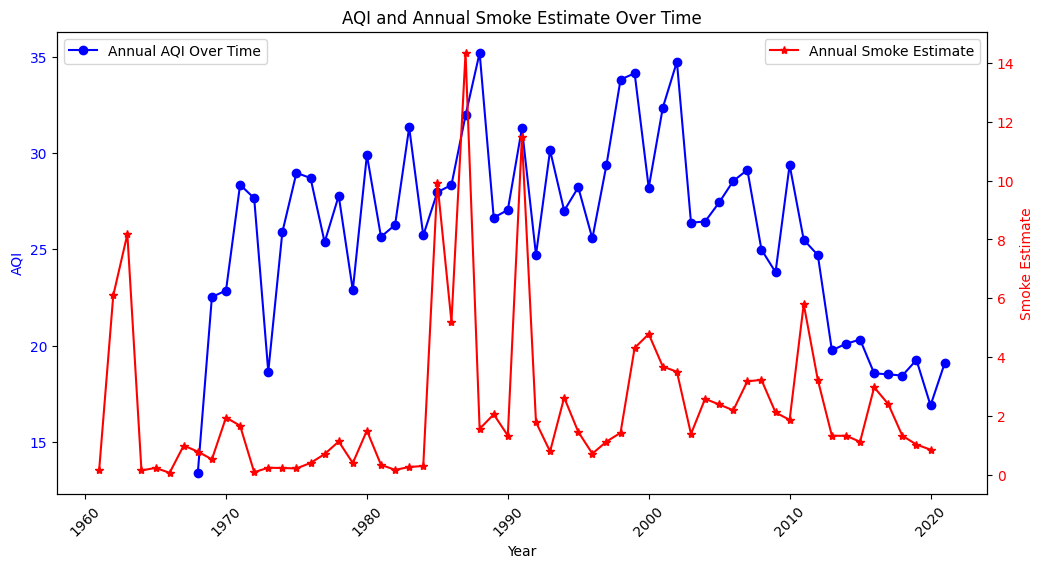

In [5]:
# Group by year to calculate annual averages
annual_smoke_estimate = filtered_df.groupby('year')['smoke_estimate'].mean()

# Plotting both AQI over time and annual smoke estimate on the same plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot AQI on the primary y-axis
ax1.plot(annual_aqi.index, annual_aqi, marker = 'o', label='Annual AQI Over Time', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('AQI', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('AQI and Annual Smoke Estimate Over Time')
ax1.tick_params(axis='x', rotation=45)

# Use the secondary y-axis to plot the annual smoke estimate
ax2 = ax1.twinx()
ax2.plot(annual_smoke_estimate.index, annual_smoke_estimate, marker = '*', label='Annual Smoke Estimate', color='red')
ax2.set_ylabel('Smoke Estimate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [6]:
# We can merge the two AQI and smoke estimate data to get the correlation, thus we merge on "Year", keeping all years from both DataFrames
df_annual_aqi = annual_aqi.to_frame(name='annual_aqi')
df_annual_smoke_estimate = annual_smoke_estimate.to_frame(name='annual_smoke_estimate')

merged_df = pd.merge(df_annual_aqi, df_annual_smoke_estimate, left_index=True, right_index=True)

In [7]:
correlation = merged_df[['annual_smoke_estimate', 'annual_aqi']].corr().iloc[0, 1]
print(f'Pearson correlation between Total annual smoke impact and Average annual AQI: {correlation}')

Pearson correlation between Total annual smoke impact and Average annual AQI: 0.3103403257898602


The correlation between the average AQI and calculated smoke estimate is mild. This could be due to other factors influencing smoke estimates which are not considered in the formulation.

### Step 2 : Forecast smoke estimates

In [8]:
df = merged_df.reset_index()
df = df[['year', 'annual_smoke_estimate']]

# Split data into train and test sets
train_df = df[df['year'] < 2020]
test_df = df[df['year'] >= 2020]

I chose the ARIMA model for predicting wildfire smoke because it handles time-series data well, capturing trends and patterns from historical estimates. It provides reliable forecasts with confidence intervals, helping me understand potential future impacts.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


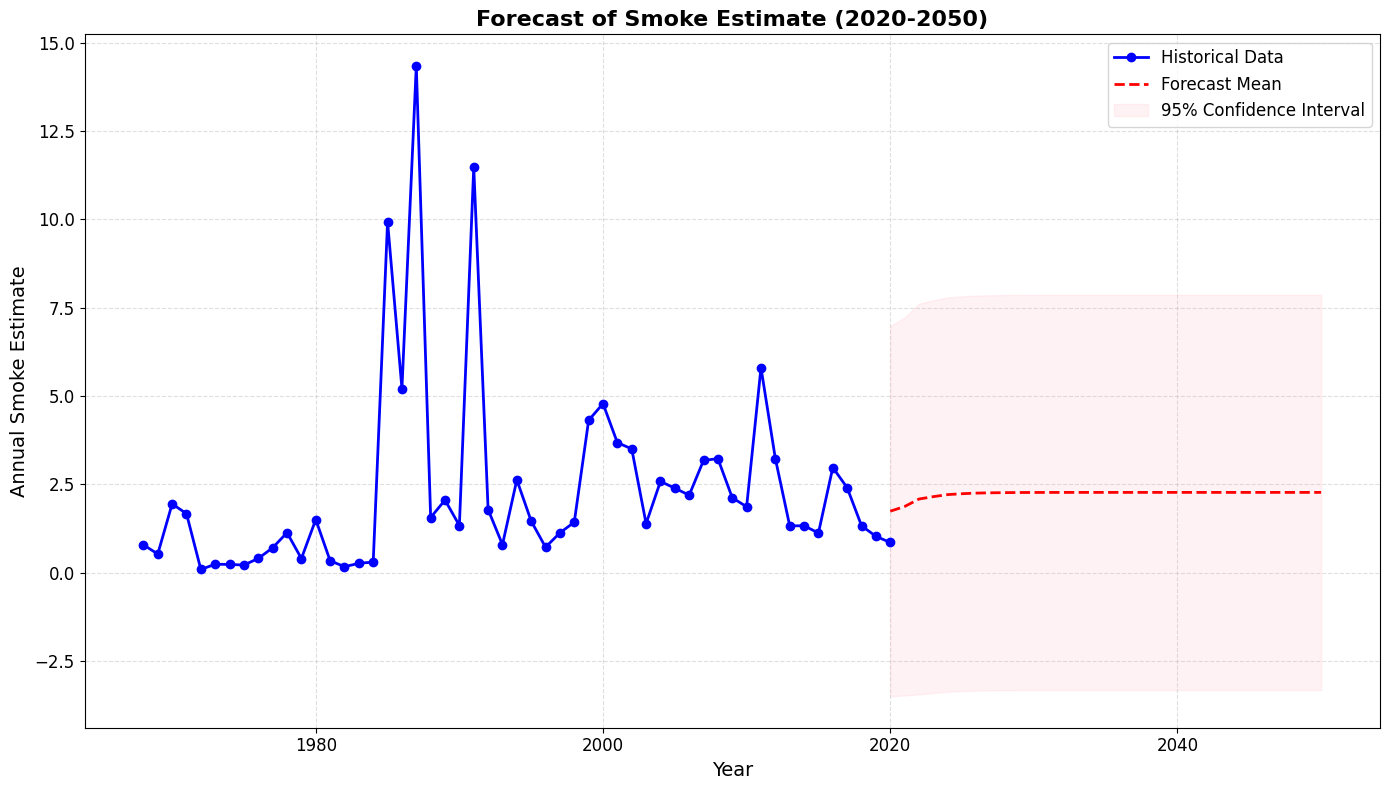

In [12]:
# Assuming df is already prepared with 'year' and 'annual_smoke_estimate' columns
forecast_years = range(2020, 2051)
n_forecasts = len(forecast_years)

# Fit ARIMA model
forecast_result = ARIMA(df['annual_smoke_estimate'], order=(2, 1, 1)).fit()
forecast = forecast_result.get_forecast(steps=n_forecasts)

# Extract forecast mean and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int(alpha=0.05)  # 95% confidence interval

# Plotting the data
plt.figure(figsize=(14, 8))

# Plot historical data
plt.plot(df['year'], df['annual_smoke_estimate'], label='Historical Data', color='blue', marker='o', linewidth=2)

# Plot forecast mean
plt.plot(forecast_years, forecast_mean, label='Forecast Mean', color='red', linestyle='--', linewidth=2)

# Plot confidence intervals
plt.fill_between(
    forecast_years, 
    forecast_conf_int.iloc[:, 0], 
    forecast_conf_int.iloc[:, 1], 
    color='pink', alpha=0.2, label='95% Confidence Interval'
)

# Add labels, title, and legend
plt.title("Forecast of Smoke Estimate (2020-2050)", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Annual Smoke Estimate", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.4, linestyle='--')
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


Above model is forecasting the smoke estimate for Alexandria from 2021 to 2050 with a 95% confidence interval. I choose to use Arima model as it is a time series data. The resultant smoke estimate seems to stay constant over the period of time which does not seem realistic. In an ideal case the smoke estimates should be varying with other external factors which we have not incorporated in the analysis like the wind direction, temperature, etc.

In [11]:
# save smoke estimates predicted

# Create a DataFrame for forecasted data
forecast_df = pd.DataFrame({
    'year': forecast_years,
    'forecast_mean': forecast_mean.values,
    'lower_bound': forecast_conf_int.iloc[:, 0].values,
    'upper_bound': forecast_conf_int.iloc[:, 1].values
})

# Combine historical data with forecasted data
df_combined = pd.concat([df, forecast_df.rename(columns={'forecast_mean': 'annual_smoke_estimate'})], ignore_index=True)

# Save to CSV
df_combined.to_csv("../intermediary_files/smoke_estimates_with_forecast.csv", index=False)